# Terningkast og stokastiske variabler

I denne notatboken forsøker vi å illustrere sammenhengen mellom konsepter som vi lærte i uke 1 og teorien om stokastiske variabler fra uke 3. 

Vi skal se at det finnes en sammenheng mellom 

* gjennomsnitt og forventningsverdi, 
* empirisk standardavvik og standardavviket til en stokastisk variabel, og 
* empirisk korrelasjonskoeffisient til et datasettet og korrelasjonen mellom to stokastiske variabler. 

Disse sammenhengene kommer vi også tilbake til i uke 7 når vi introduserer *estimering* basert på tilfeldige utvalg. 

Når vi kaster en rettferdig terning har vi 6 mulige utfall; 1-er, 2-er, 3-er, 4-er, 5-er eller 6-er. Alle utfallene er like sannsynlige, f.eks er $P(\text{2-er}) = 1/6$

Vi kan definere en stokastisk variabel $X$ som representerer antall øyne på terningen i et terningkast. 

Vi sier gjerne at den stokastiske variabelen er en _funksjon som oversetter utfallene av et stokastisk forsøk til tall på tallinja_. 

Den stokastiske variabelen $X$ kan dermed ta verdiene $1, 2, 3, 4, 5, 6$, det er en diskret stokastisk variabel, og $P(X=x) = 1/6$ for $x = 1, 2, \ldots, 6$. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt # plotting

## Forventningsverdi

Forventningsverdien til en diskret stokastisk variabel er gitt ved $\text{E}(X) = \sum_x x \cdot P(X=x)$. For terningkastet vil dermed $\text{E}(X) = 3.5$. Hvordan skal vi forstå dette begrepet *forventningsverdi*?

I koden under simulerer vi $n$ terningkast og regner ut gjennomsnittet av antall øyne på terningen fra hvert kast. 

In [2]:
# sjekker ut funksjonen vi vil bruke for å "kaste terning"
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

np.random.randint(1,7) # her får vi et tall mellom 1 og 6 (7-1) - øvre grense ikke med, men nedre grense er med

5

In [3]:
n = 10 # antall kast vi skal gjøre

x =  np.zeros(n) # initialiserer x-vektor med bare 0-er, den blir n lang

for i in range(n):
        x[i] = np.random.randint(1,7)  # trekker tilfeldig tall mellom 1 og 6 (7-1)

print(x)
gjsnitt = sum(x)/n
print(gjsnitt)

[4. 5. 6. 2. 2. 2. 1. 6. 6. 4.]
3.8


Vi har lyst til å plotte dette grafisk og se hvordan gjennomsnittet endrer seg når vi øker _n_, 
men først ser vi hvordan vi kan regne ut mange gjennomsnitt fra vår vektor _x_ som har lengte _n=10_ over.


In [4]:
# tester ut np.cumsum på x som hadde lengde 10 over
np.cumsum(x)

array([ 4.,  9., 15., 17., 19., 21., 22., 28., 34., 38.])

Dette er summen av ett tall, så av 2 og så videre. Hvis vi da deler på 1 til _n_ vår vi _n_ gjennomsnitt. 

In [5]:
print(range(1,n+1)) # vil gi tallene fra 1 til og med n
gjsnvec=np.cumsum(x)/range(1,n+1)
print(gjsnvec)

range(1, 11)
[4.         4.5        5.         4.25       3.8        3.5
 3.14285714 3.5        3.77777778 3.8       ]


Denne gjennomsnittsvektoren vil vi plotte, for å se hvordan den endrer seg når vi øker _n_.
Under har vi satt _n_ til 1000 og plotter så gjennomsnittet som en funksjon av _n_. 

Vi bruker en pakke som heter seaborn for å lage et fin graf av antall kast mot gjennomsnittet av så mange kast.

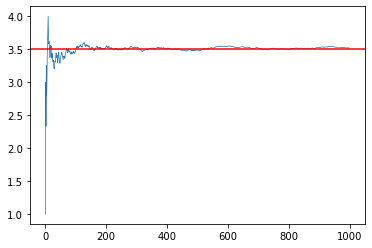

In [6]:
n = 1000 # antall kast vi skal gjøre

x =  np.zeros(n) # initialiserer x-vektor med bare 0-er, den blir n lang

for i in range(n):
        x[i] = np.random.randint(1,7)  # trekker tilfeldig tall mellom 1 og 6 (7-1)

gjsnvec=np.cumsum(x)/range(1,n+1)
plt.plot(range(1,n+1), gjsnvec,linewidth=0.7, markersize=1)
plt.axhline(y=3.5, color='r', linestyle='-')
plt.show()

## Varians og standardavvik

Variansen til en diskret stokastisk variabel er gitt ved $\text{Var}(X) = \sum_x (x - \text{E}(X))^2 P(X=x)$. Variansen er faktisk forventningsverdien til $(X - \text{E}(X))^2$. For terningkastet kan vi regne ut $\text{Var}(X) = 2.917$ når vi runder av til tre desimaler. Standardavviket er kvadratroten av variansen, slik at $\text{SD}(X) = 1.708$. 

Husker du empirisk standardavvik og varians fra første uke om beskrivende statistikk? Da definerte vi empirisk varians av $n$ observasjoner som 
$S^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$. 

I koden under simulerer vi $n$ terningkast og regner ut empirisk varians. Hva skjer når du øker antallet kast? 

In [7]:
n = 100 # antall kast vi skal gjøre

x =  np.zeros(n) # initialiserer x-vektor med bare 0-eller

for i in range(n):
        x[i] = np.random.randint(1,7)  # trekker tilfeldig tall mellom 1 og 6 (7-1)
        
gjsnitt = sum(x)/n
varians = sum((x-gjsnitt)**2)/(n-1)
print(varians)

2.919191919191919


In [8]:
gjsnvec=np.cumsum(x)/range(1,n+1)
#print(gjsnvec)

NB: det blir en feilmelding her fordi vi regner empirisk varians også for 1 observasjon - og da blir nevneren 0. Vi bruker ikke denne verdien i plottet under og plotter fra 2.

In [9]:
print(max(range(0,n)))
varvec=np.cumsum((x-gjsnvec)**2)/range(0,n) 
      
#ja det blir feilmelding fordi vi deler på 0 når vi har 1 observasjon - men det skal vi aldri bruke
#print(varvec[1:n])

99


<ipython-input-9-8a65ab6109fd>:2: RuntimeWarning: invalid value encountered in true_divide
  varvec=np.cumsum((x-gjsnvec)**2)/range(0,n)


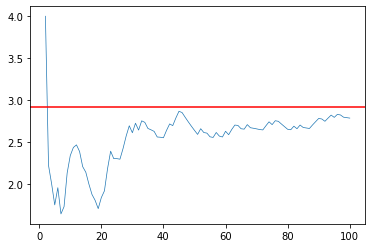

In [10]:
plt.plot(range(2,n+1), varvec[1:n],linewidth=0.7, markersize=1)
plt.axhline(y=2.917, color='r', linestyle='-')
plt.show()

Sjekk om det blir "bedre" hvis du setter _n_ opp til 1000 eller 1000. Hva mener vi med "bedre" her?

## Kovarians og korrelasjon

Tenk deg at du har to terninger som du kaster samtidig. La $X$ representere antall øyne på den ene terningen, og la $Y$ representere antall øyne på den andre terningen. Siden det ikke er noen grunn til å tro at utfallet på den ene terningen kan påvirke utfallet på den andre terningen kan vi si at de to stokastiske variablene er uavhengige. Dermed vet vi også at $\text{Cov}(X,Y) = 0$ og at korrelasjonen mellom $X$ og $Y$ er null. 

Hva har korrelasjon mellom to stokastiske variabler å gjøre med den empiriske korrelasjonskoeffisienten som vi regnet ut for parvise observasjoner i uke 1? Den empiriske korrelasjonskoeffisienten mellom $n$ parvise observasjoner definerte vi som $$\rho = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$$

I koden under simulerer vi $n$ parvise terningkast og regner ut korrelasjon. Hva skjer når du øker antallet kast? 

In [11]:
n = 100 # antall kast vi skal gjøre

x = np.zeros(n) # initialiserer x-vektor med bare 0-eller
y = np.zeros(n) # initialiserer y-vektor med bare 0-eller

for i in range(n):
        x[i] = np.random.randint(1,7)  # trekker tilfeldig tall mellom 1 og 6 (7-1)
        y[i] = np.random.randint(1,7)  # trekker tilfeldig tall mellom 1 og 6 (7-1)

gjsnitt_x = sum(x)/n
gjsnitt_y = sum(y)/n
teller = sum((x-gjsnitt_x)*(y-gjsnitt_y))
nevner = (math.sqrt(sum((x-gjsnitt_x)**2)))*(math.sqrt(sum((y-gjsnitt_y)**2)))
korrelasjon = teller/nevner
print(korrelasjon)

0.23987085512697984


## Konklusjon

I denne notatboken har vi sammenlignet teoretisk egenskaper til en stokastiske variabel $X$, eller egenskaper ved sammenhengen mellom to stokastiske variabler $X$ og $Y$ - med empiriske mål vi lærte om i uke 1 om beskrivende statistikk. 

Her gjorde vi veldig mange identiske forsøk for å generere verdier for $X$ og $Y$, og så brukte vi formelen fra uke 1 om beskrivende statistikk og sjekket hvordan svaret vi fikk passet med de teoretiske begrepene vi har lært i uke 3 om Stokastiske variabler. 